# **Libro DEEP LEARNING - Introduccion Practica con Keras** Jordi Torres

## **Redes Densamente Conectadas** **Parte I**
-----



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [41]:
import keras
keras.__version__

'2.4.3'

In [3]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


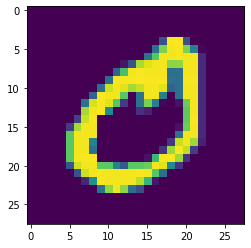

In [4]:
plt.imshow(x_train[21])

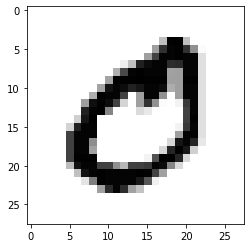

In [5]:
plt.imshow(x_train[21], cmap=plt.cm.binary)

In [6]:
np.set_printoptions(precision=2, suppress=True, linewidth=120)
print(np.matrix(x_train[21]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  64 253 255  63   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 205 251 253 205 111   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 189 251 251 253 251 251  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  16  64 223 244 251 251 211 213 251 251  31   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  80 181 251 253 251 251 251  94  9

In [7]:
# Mostramos la label:
print(y_train[21])

0


In [8]:
# Dimension del train:
print(x_train.ndim)

3


In [9]:
# Shape:
print(x_train.shape)

(60000, 28, 28)


In [10]:
# Tipo de data:
print(x_train.dtype)

uint8


## **Normalizacion de los datos de entrada**

Estas imágenes de MNIST de 28×28 píxeles se representan como una matriz de números cuyos valores van entre [0, 255] de tipo uint8. Pero como veremos en posteriores capítulos, es habitual escalar los valores de entrada de las redes neuronales a unos rangos determinados. En el ejemplo de este capítulo los valores de entrada conviene escalarlos a valores de tipo float32 dentro del intervalo [0, 1]:

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
x_train /= 255
x_test /=255

In [13]:
# convertimos el vector en una sola columna de 28*28:
x_train.reshape(60000,784)
x_test.reshape(10000,784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [15]:
# ONE-HOT-ENCODING: consiste en transformar las etiquetas en un vector de tantos ceros 
#como el número de etiquetas distinta, y que contiene el valor de 1 en el índice que le corresponde al valor de la etiqueta

from keras.utils import to_categorical

In [16]:
print(y_test[45])

5


In [17]:
print(y_train[12])

3


In [18]:
y_train.shape

(60000,)

In [19]:
y_test.shape

(10000,)

In [20]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [21]:
print(y_test[45])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [22]:
print(y_train[12])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [23]:
print(y_train.shape)

(60000, 10)


## **Redes densamente conectadas en Keras**

La clase Sequential de la librería de Keras es una envoltura para el modelo de red neuronal secuencial que ofrece Keras y se puede crear de la siguiente manera:

In [24]:
from keras.models import Sequential

In [25]:
model = Sequential()

In [26]:
# Construccion del Modelo:
from keras.layers.core import Dense,Activation

In [27]:
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10,activation='softmax'))

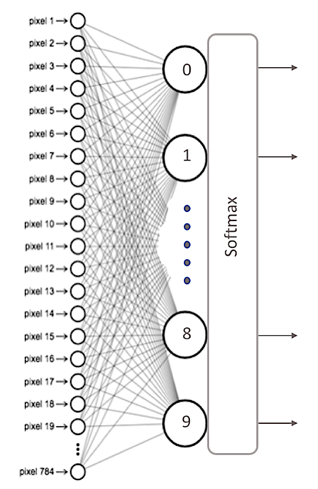

La segunda capa es una capa softmax de 10 neuronas, lo que significa que devolverá una matriz de 10 valores de probabilidad que representan a los 10 dígitos posibles (en general, la capa de salida de una red de clasificación tendrá tantas neuronas como clases, menos en una clasificación binaria, en donde solo necesita una neurona). Cada valor será la probabilidad de que la imagen del dígito actual pertenezca a cada una de ellas.

In [28]:
# resumen:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


En la primera capa por cada neurona i (entre 0 y 9) requerimos 784 parámetros para los pesos wij y por tanto 10 x 784 parámetros para almacenar los pesos de las 10 neuronas. Además de los 10 parámetros adicionales para los 10 sesgos bj correspondientes a cada una de ellas. En la segunda capa, al ser una función softmax, se requiere conectar todos sus 10 nodos con los 10 nodos de la capa anterior, y por tanto se requieren 10×10 parámetros wi además de los correspondientes 10 sesgos bj correspondientes a cada nodo.

## **Configuración del proceso de aprendizaje**

A partir del modelo Sequential, podemos definir las capas de manera sencilla con el método add(), tal como hemos avanzado en el apartado anterior. Una vez que tengamos nuestro modelo definido, podemos configurar cómo será su proceso de aprendizaje con el método compile( ), con el que podemos especificar algunas propiedades a través de argumentos del método.

El primero de estos argumentos es la función de loss que usaremos para evaluar el grado de error entre salidas calculadas y las salidas deseadas de los datos de entrenamiento. Por otro lado, se especifica un optimizador que, como veremos, es la manera que tenemos de especificar el algoritmo de optimitzaación que permite a la red neuronal calcular los pesos de los parámetros a partir de los datos de entrada y de la función de loss definida. Más detalle del propósito exacto de la función de loss y el optimizador se presentarán en el siguiente capítulo.

Y finalmente debemos indicar la métrica que usaremos para monitorizar el proceso de aprendizaje (y prueba) de nuestra red neuronal. En este primer ejemplo solo tendremos en cuenta la accuracy (fracción de imágenes que son correctamente clasificadas). Por ejemplo, en nuestro caso podemos especificar los siguientes argumentos en método compile( ) para probarlo en nuestro ordenador:

In [29]:
from keras.optimizers import SGD

In [45]:
model.summary()

batch_size = 100
num_classes = 10
epochs=5

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 929us/step - loss: 0.5329 - accuracy: 0.8785
Test loss: 0.5328716039657593
Test accuracy: 0.8784999847412109


Debe el lector fijarse que, en este ejemplo, para evaluar este modelo solo nos hemos centrado en su accuracy, es decir la proporción entre las predicciones correctas que ha hecho el modelo y el total de predicciones. Sin embargo, aunque en ocasiones resulta suficiente, otras veces es necesario profundizar un poco más y tener en cuenta los tipos de predicciones correctas e incorrectas que realiza el modelo en cada una de sus categorías.

En el mundo de Machine Learning una herramienta para evaluar modelos es la matriz de confusión (confusion matrix), una tabla con filas y columnas que contabilizan las predicciones en comparación con los valores reales. Usamos esta tabla para entender mejor cómo el modelo se comporta de bien y es muy útil para mostrar de forma explícita cuando una clase es confundida con otra. Una matriz de confusión para un clasificador binario como el explicado al principio del capítulo tiene esta estructura:

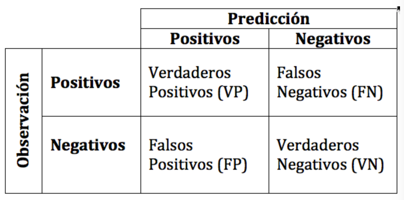



* VP es la cantidad de positivos que fueron clasificados correctamente como positivos por el modelo.
* VN es la cantidad de negativos que fueron clasificados correctamente como negativos por el modelo.
* FN es la cantidad de positivos que fueron clasificados incorrectamente como negativos.
* FP es la cantidad de negativos que fueron clasificados incorrectamente como positivos.

Ahora bien, la accuracy puede ser engañosa en la calidad del modelo porque al medirla para el modelo concreto no distinguimos entre los errores de tipo falso positivo y falso negativo, como si ambos tuvieran la misma importancia. Por ejemplo, piensen en un modelo que predice si una seta es venenosa. En este caso, el coste de un falso negativo, es decir, una seta venenosa dada por comestible podría ser dramático. En cambio al revés, un falso positivo, tiene un coste muy diferente.

Por ello tenemos otra métrica llamada Sensitivity (o recall) que nos indica cómo de bien el modelo evita los falsos negativos:

In [50]:
import numpy
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

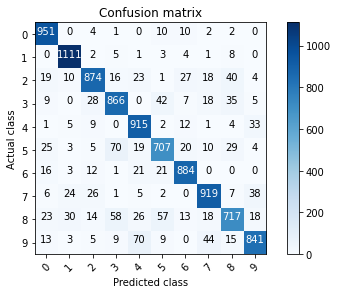

In [51]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

En este caso los elementos de la diagonal representan el número de puntos en que la etiqueta que predice el modelo coincide con el valor real de la etiqueta, mientras que los otros valores nos indican los casos en que el modelo ha clasificado incorrectamente. Por tanto, cuanto más altos son los valores de la diagonal mejor será la predicción. En este ejemplo, si el lector calcula la suma de los valores de la diagonal dividido por el total de valores de la matriz, observará que coincide con la accuracy que nos ha retornado el método evaluate().

**ACTIVATION RELU**:

In [52]:
batch_size = 100
num_classes = 10
epochs=5

model2 = Sequential()
model2.add(Dense(10, activation='relu', input_shape=(784,)))
model2.add(Dense(10, activation='softmax'))


model2.summary()


model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model2.evaluate(x_test, y_test)

print('Model2 - Test loss:', test_loss)
print('Model2 - Test accuracy:', test_acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 987us/step - loss: 0.3888 - accuracy: 0.8898
Model2 - Test loss: 0.3887785077095032
Model2 - Test accuracy: 0.8898000121116638


In [53]:
## 512 NODOS CAPA INTERMEDIA:
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(784,)))
model3.add(Dense(10, activation='softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
 
epochs = 10
model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0
          )

test_loss, test_acc = model3.evaluate(x_test, y_test)

print('Model3 - Test loss:', test_loss)
print('Model3 - Test accuracy:', test_acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.2406 - accuracy: 0.9332
Model3 - Test loss: 0.24059151113033295
Model3 - Test accuracy: 0.9332000017166138


**Generación de predicciones**

Finalmente, nos queda el paso de usar el modelo creado en los anteriores apartados para realizar predicciones sobre qué dígito representan nuevas imáges. Para ello Keras ofrece el método predict() de un modelo que ya ha sido previamente entrenado.
Para probar este método podemos elegir un elemento cualquiera, por ejemplo uno del conjunto de datos de test x_test. Por ejemplo elijamos el elemento 11 de este conjunto de datos x_test y veamos a que clase corresponde según el modelo entrenado de que disponemos.

TypeError: ignored

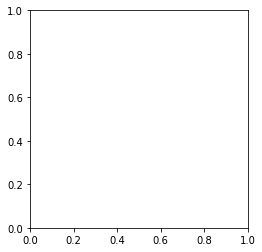

In [54]:
plt.imshow(x_test[11], cmap=plt.cm.binary)

In [55]:
predictions = model.predict(x_test)

In [56]:
np.argmax(predictions[11])

6

In [57]:
print(predictions[11])

[0.11 0.05 0.15 0.03 0.05 0.05 0.44 0.   0.11 0.01]


In [58]:
np.sum(predictions[11])

0.99999994